# Diamond Price Prediction

## Import Data and Packages

### import packages

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Download the Data 

In [50]:
data_url = "https://raw.githubusercontent.com/tidyverse/ggplot2/master/data-raw/diamonds.csv"
# df = pd.read_csv(data_url)
# df.to_csv("Data/diamonds.csv", index=False)

### Data Understanding

In [51]:
df = pd.read_csv("Data/diamonds.csv")
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


* Price in US dollars ($) is the target feature.
* carat: represents the weight of the diamonds (0.2-5.01), used as a measure of gemstones and jewelry.
* cut: represents the quality of the diamonds cut (Fair, Good, Very Good, Premium, and Ideal).
* color: represents the color, from J (worst) to D (best).
* clarity: represents how clear the diamonds are (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x: represents the length of the diamonds in mm (0-10.74).
* y: represents the width of the diamonds in mm (0-58.9).
* z: represents the depth of the diamonds in mm (0-31.8).
* depth: represents z/mean(x, y) = 2 * z/(x + y) (43-79).
* table: represents the width of the top of the diamond relative to the widest point 43-95).

## Exploratory Data Analysis (EDA) and Data Cleaning

EDA Question:

* What are the types of variables in the dataset?
* How is the distribution of variables in the dataset?
* Are there any missing values?
* Are there any redundant features?
* How is the correlation between features and targets?

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [53]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Find missing value

In [54]:
x = (df.x == 0).sum()
y = (df.y == 0).sum()
z = (df.z == 0).sum()
 
print("Nilai 0 di kolom x ada: ", x)
print("Nilai 0 di kolom y ada: ", y)
print("Nilai 0 di kolom z ada: ", z)

Nilai 0 di kolom x ada:  8
Nilai 0 di kolom y ada:  7
Nilai 0 di kolom z ada:  20


### remove rows with x, y, or z equals to 0

In [55]:
df = df[(df[['x','y','z']] != 0).all(axis=1)]
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Find outliers

<Axes: xlabel='carat'>

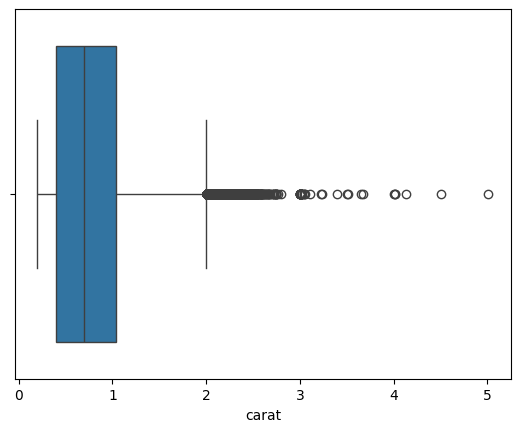

In [56]:
sns.boxplot(x=df['carat'])

<Axes: xlabel='table'>

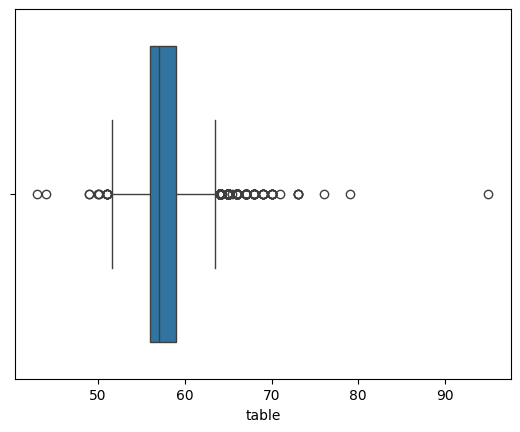

In [57]:
sns.boxplot(x=df['table'])

<Axes: xlabel='x'>

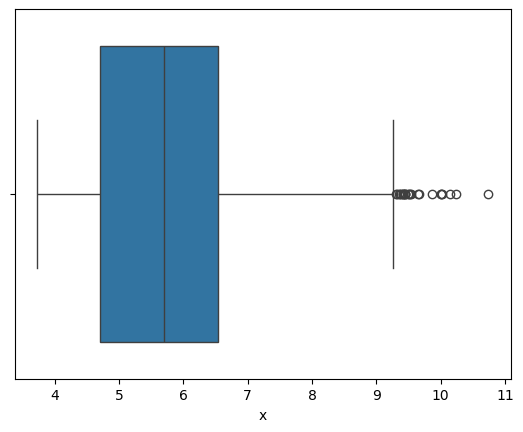

In [58]:
sns.boxplot(x=df['x'])

### Change the outlier using IQR

In [59]:
Q1 = df['x'].quantile(0.25)
Q3 = df['x'].quantile(0.75)

IQR = Q3 - Q1
df = df[~((df['x'] < (Q1 - 1.5 * IQR)) | (df['x'] > (Q3 + 1.5 * IQR)))]
df.describe()

,carat,depth,table,price,x,y,z
count,53896.000000,53896.000000,53896.000000,53896.000000,53896.000000,53896.000000,53896.000000
mean,0.796514,61.749564,57.456147,3925.804141,5.729881,5.733182,3.538983
std,0.470424,1.431349,2.233402,3980.174146,1.116584,1.137488,0.700815
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2400.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5317.000000,6.540000,6.540000,4.030000
max,3.110000,79.000000,95.000000,18823.000000,9.260000,58.900000,31.800000


In [60]:
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

### Categorical Feature Analytics

           jumlah sampel  persentase
cut                                 
Ideal              21546        40.0
Premium            13768        25.5
Very Good          12080        22.4
Good                4899         9.1
Fair                1603         3.0


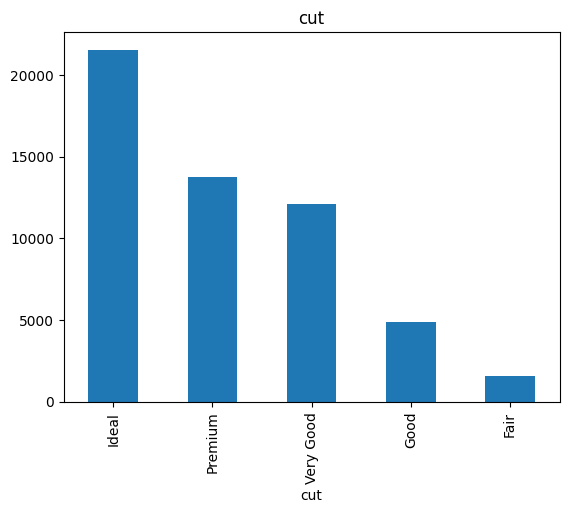

In [61]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_cut = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_cut)
count.plot(kind='bar', title=feature);

       jumlah sampel  persentase
color                           
G              11282        20.9
E               9797        18.2
F               9538        17.7
H               8292        15.4
D               6773        12.6
I               5413        10.0
J               2801         5.2


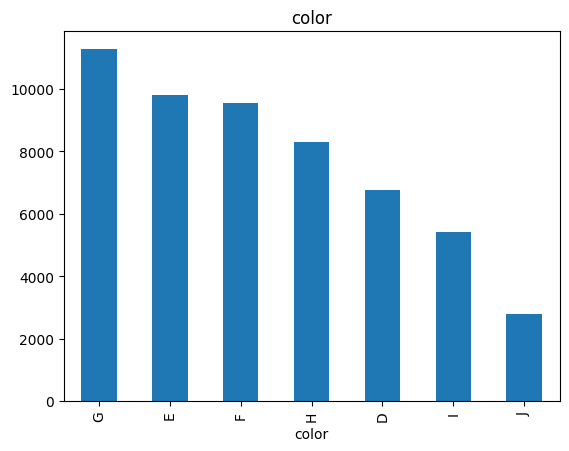

In [62]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_color = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_color)
count.plot(kind='bar', title=feature);

         jumlah sampel  persentase
clarity                           
SI1              13063        24.2
VS2              12253        22.7
SI2               9177        17.0
VS1               8170        15.2
VVS2              5066         9.4
VVS1              3654         6.8
IF                1790         3.3
I1                 723         1.3


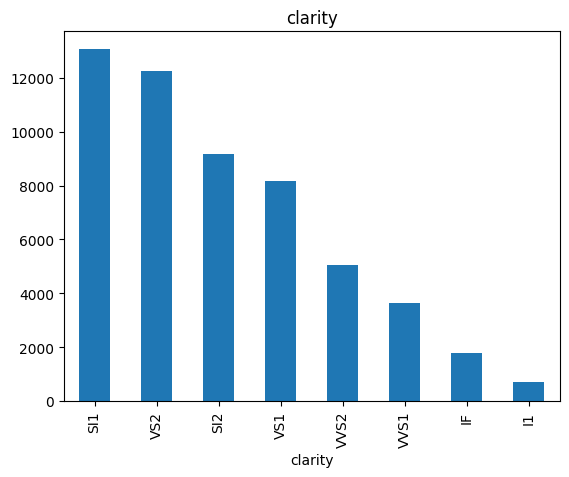

In [63]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_clarity = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_clarity)
count.plot(kind='bar', title=feature);

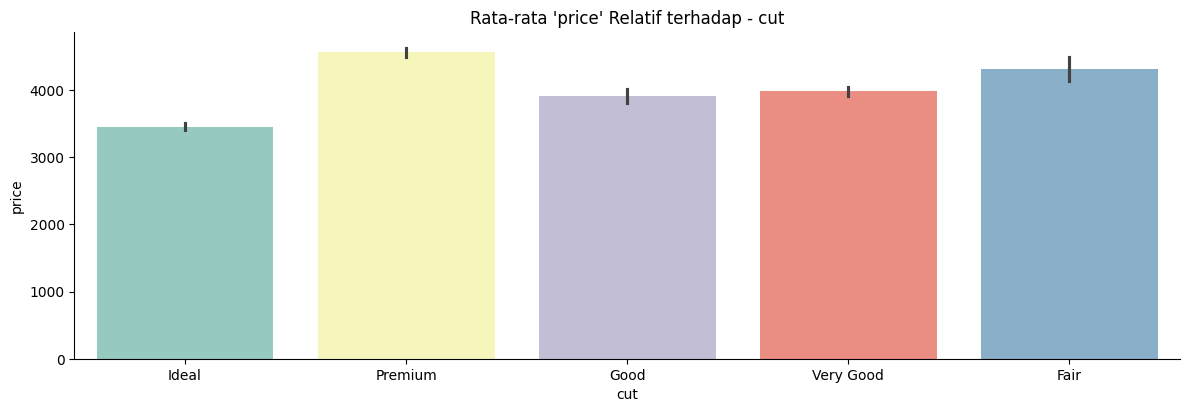

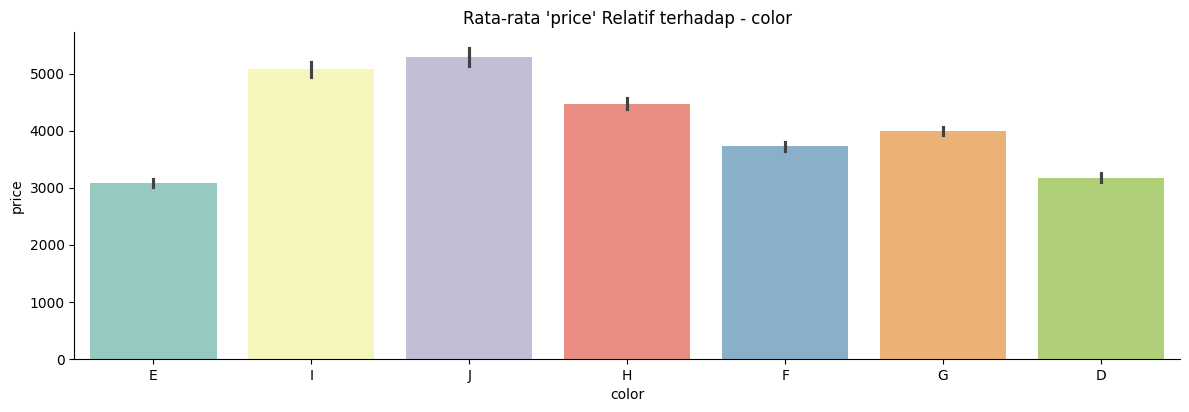

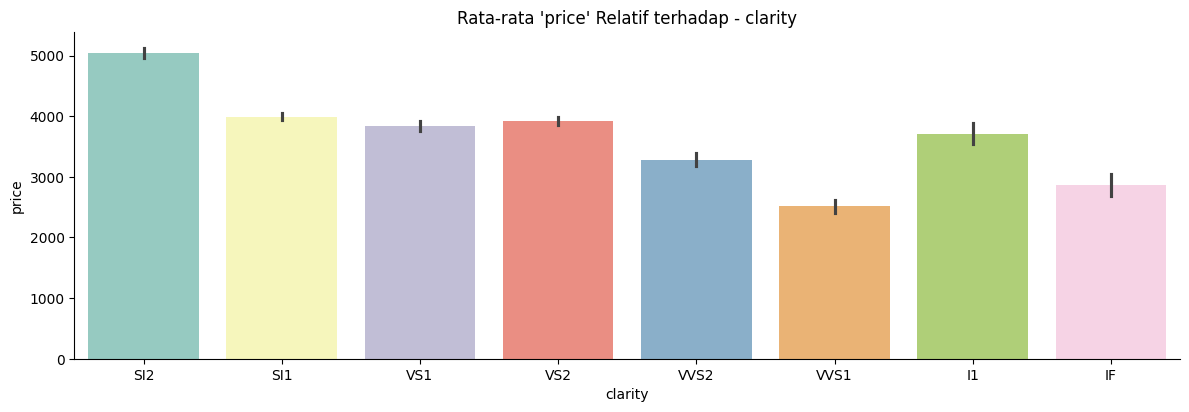

In [64]:
cat_features = df.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="price", hue=col, kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set3", legend=False)
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

### Numerical Feature Analytics

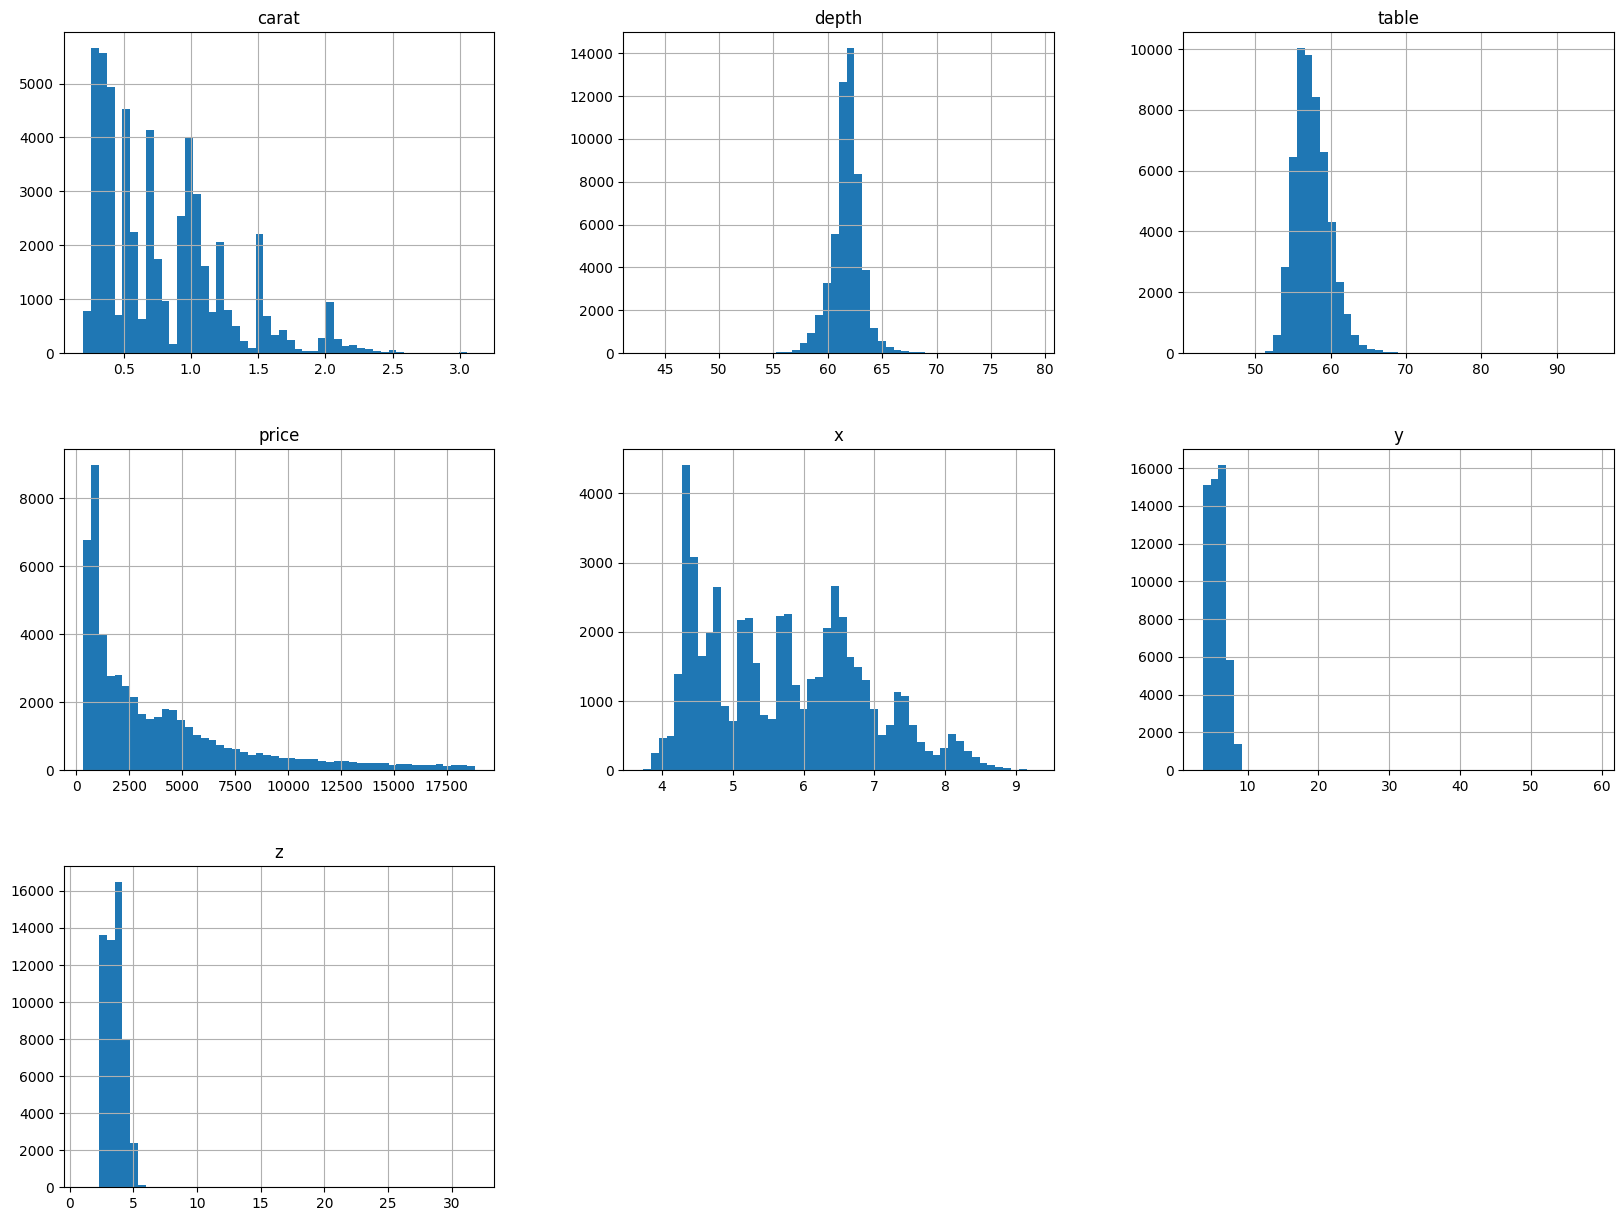

In [65]:
df.hist(bins=50, figsize=(20,15))
plt.show()

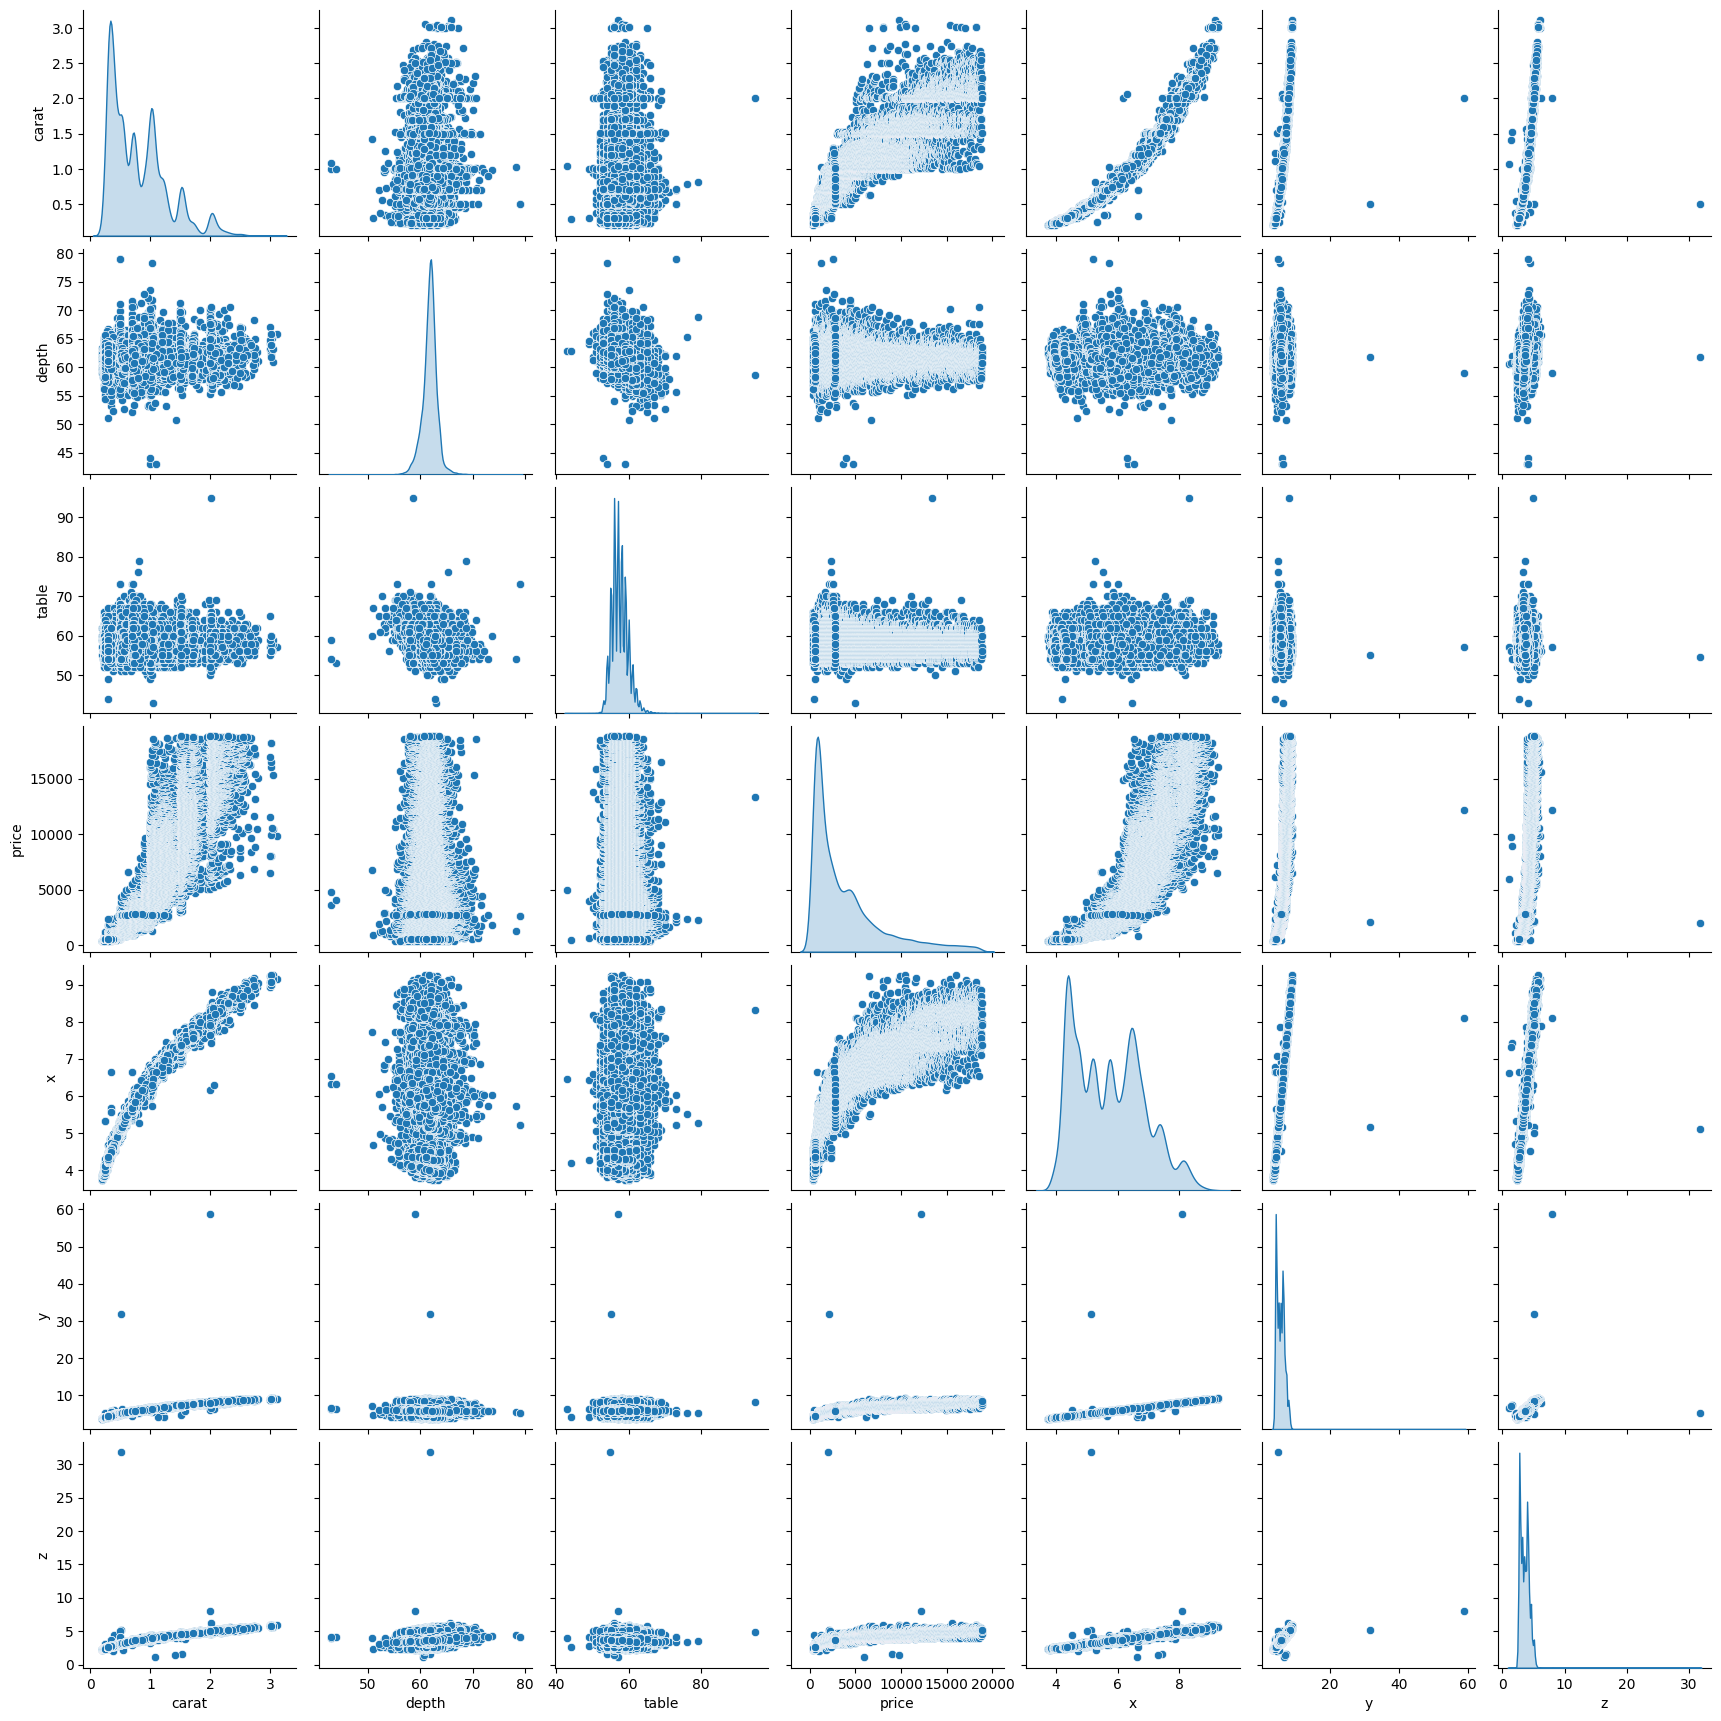

In [66]:
sns.pairplot(df, diag_kind = 'kde');

### Feature to target analytics

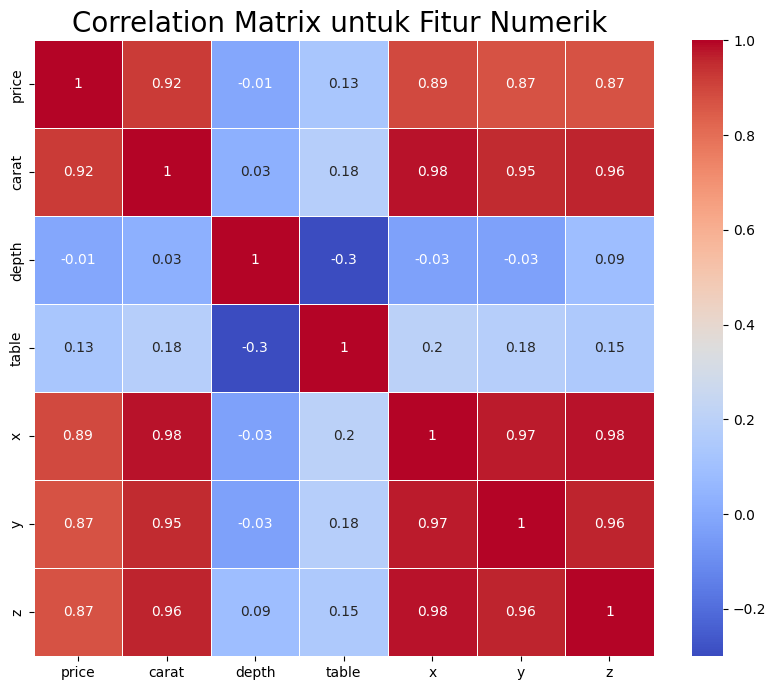

In [67]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20);

In [68]:
df.drop(['depth'], inplace=True, axis=1)
df.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75


## Data Prepration

### One hot encoding on categorical data

In [69]:
df = pd.concat([df, pd.get_dummies(df['cut'], prefix='cut')], axis=1)
df = pd.concat([df, pd.get_dummies(df['color'], prefix='color')], axis=1)
df = pd.concat([df, pd.get_dummies(df['clarity'], prefix='clarity')], axis=1)

df.drop(['cut', 'color', 'clarity'], inplace=True, axis=1)

# Convert boolean columns to integers
bool_columns = df.select_dtypes(include='bool').columns
df[bool_columns] = df[bool_columns].astype(int)

df

,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,326,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,65.0,327,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,58.0,334,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,58.0,335,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,57.0,2757,5.75,5.76,3.50,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,55.0,2757,5.69,5.75,3.61,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,60.0,2757,5.66,5.68,3.56,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,58.0,2757,6.15,6.12,3.74,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


### PCA on x, y, z feature

In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=123)
pca.fit(df[['x','y','z']])
df['dimension'] = pca.transform(df.loc[:, ('x','y','z')]).flatten()
df.drop(['x','y','z'], axis=1, inplace=True)

In [73]:
df

,carat,table,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,dimension
0,0.23,55.0,326,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,-2.733030
1,0.21,61.0,326,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,-2.910943
2,0.23,65.0,327,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,-2.657618
3,0.29,58.0,334,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,-2.329089
4,0.31,58.0,335,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,-2.112772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,57.0,2757,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.014959
53936,0.72,55.0,2757,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.013607
53937,0.70,60.0,2757,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,-0.071368
53938,0.86,58.0,2757,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0.603263


### Train test split

In [75]:
from sklearn.model_selection import train_test_split
 
X = df.drop(["price"],axis =1)
y = df["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 53896
Total # of sample in train dataset: 48506
Total # of sample in test dataset: 5390


### Standardization

In [76]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
7792,0.241484,-0.204221,0.347380
28945,-1.055062,-0.651700,-1.342329
28700,-1.055062,-1.099179,-1.264905
13711,-0.906278,-1.546658,-0.968371
20421,0.624071,-1.099179,0.786691


## Modelling

In [77]:
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

### KNN Model

In [85]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

### Random Forest Regressor Model 

In [79]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)          

### Adaptive Boost Model

In [80]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

## Model Evaluation

In [81]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

### MAE

In [90]:
mae = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
for name, model in model_dict.items():
    mae.loc[name, 'train'] = mean_absolute_error(y_true=y_train, y_pred=model.predict(X_train))
    mae.loc[name, 'test'] = mean_absolute_error(y_true=y_test, y_pred=model.predict(X_test))

mae

,train,test
KNN,350.806962,399.511095
RF,178.965391,285.756376
Boosting,801.786131,828.084714


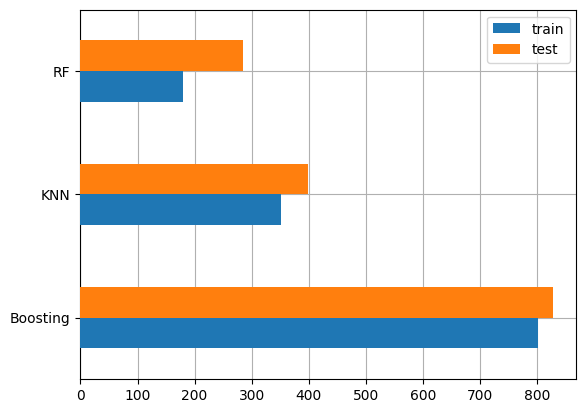

In [91]:
fig, ax = plt.subplots()
mae.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

### MSE

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
 
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
mse

,train,test
KNN,455.617387,591.895762
RF,107.921475,310.850417
Boosting,1834.936842,2005.519699


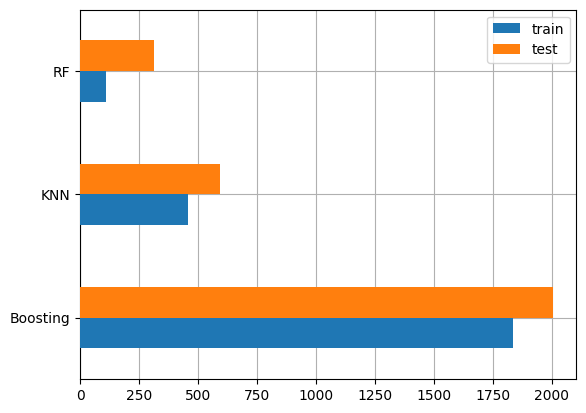

In [83]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

## Predict New Data

In [92]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
39893,1103,1049.9,1037.7,790.7
